In [12]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [14]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)
rf_classifier.fit(X_train, y_train) 

c:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=10)

In [15]:

y_pred = rf_classifier.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9822097378277154


#### Feature Scoring

In [17]:
feature_scores = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

cibil_score                 0.825830
scaled_loan_term            0.062222
loan_amount                 0.028525
luxury_assets_value         0.017492
income_annum                0.017417
commercial_assets_value     0.015119
residential_assets_value    0.014704
bank_asset_value            0.011408
no_of_dependents            0.007283
dtype: float64


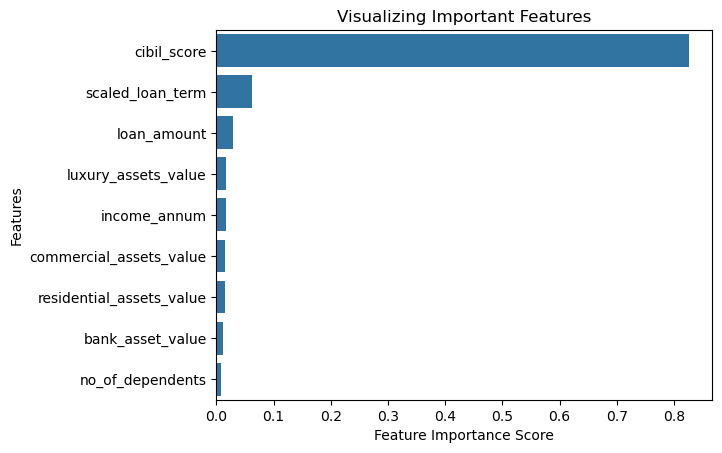

In [18]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Confusion Matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[389  11]
 [  8 660]]


#### Classification report

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       400
           1       0.98      0.99      0.99       668

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [21]:
import joblib
joblib.dump(rf_classifier, 'Random_Forest.pkl')

['Random_Forest.pkl']